In [21]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

sb.set_style("whitegrid")
sb.set_palette("husl")

In [73]:
data = pd.read_csv('../data/btcusd_1-min_data.csv')

data.head()
print(data.columns)

data['Date'] = pd.to_datetime(data['Timestamp'], unit='s')
data.set_index('Date', inplace=True)

# Changing to daily timeframe cuz 1min too small
data_daily = data.resample('D').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
}).dropna()

data_from_start = data_daily.copy() 
data_daily = data_daily[data_daily.index >= '2022-01-01'] 

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


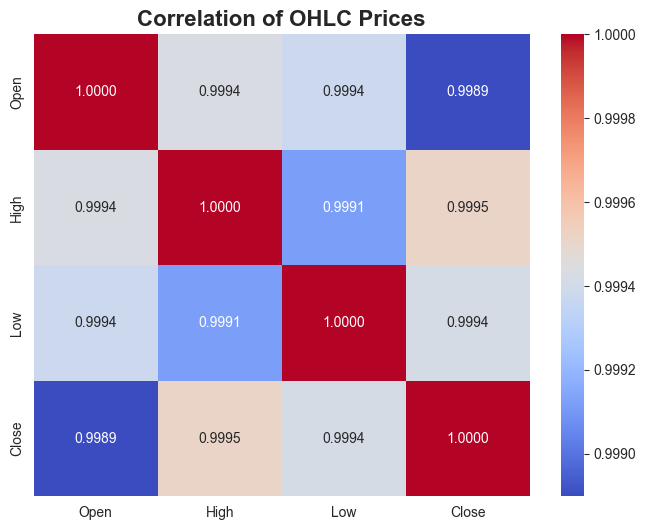

In [85]:
price_data = data_daily[['Open', 'High', 'Low', 'Close']]
# matrix
correlation_matrix = price_data.corr()

# heatmap
plt.figure(figsize=(8, 6))
plt.title('Correlation of OHLC Prices', fontsize=16, fontweight='bold')
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".4f")
plt.show()

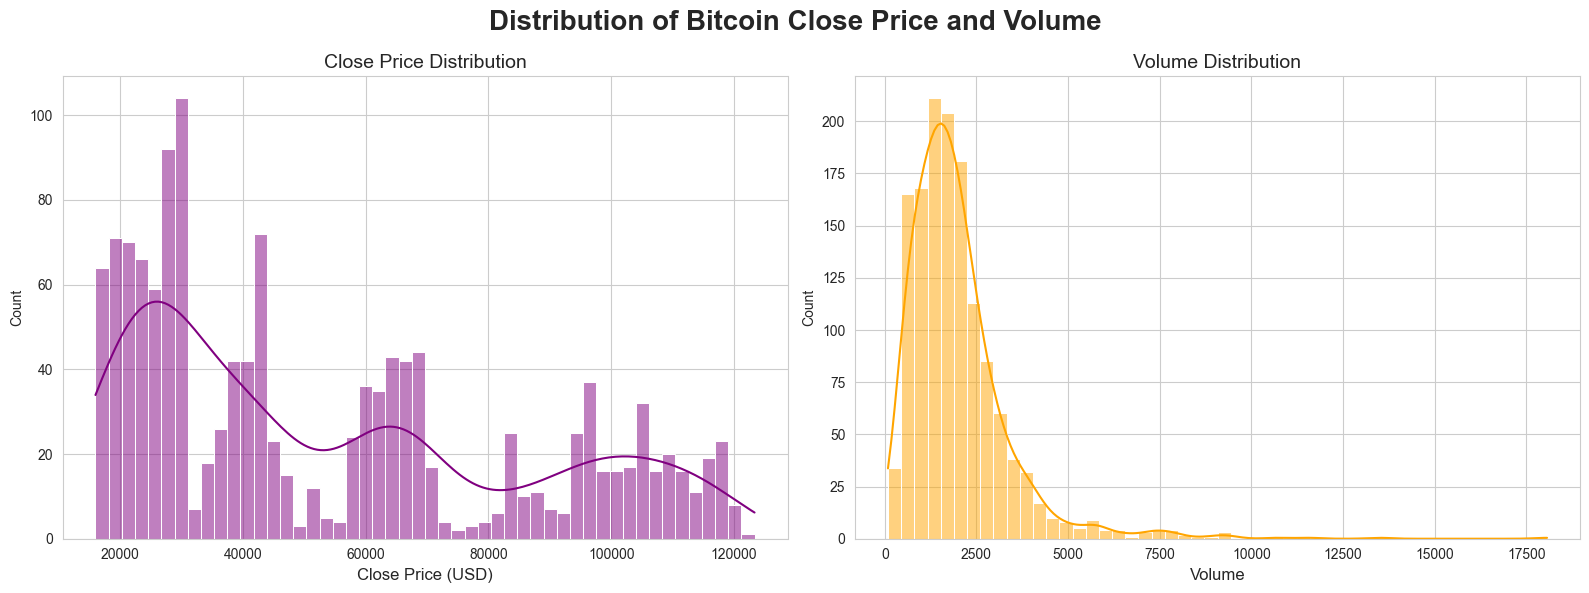

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Distribution of Bitcoin Close Price and Volume', fontsize=20, fontweight='bold')

# Close 
sb.histplot(data=data_daily, x='Close', kde=True, bins=50, color='purple', ax=axes[0])
axes[0].set_title('Close Price Distribution', fontsize=14)
axes[0].set_xlabel('Close Price (USD)', fontsize=12)

# Volume 
sb.histplot(data=data_daily, x='Volume', kde=True, bins=50, color='orange', ax=axes[1])
axes[1].set_title('Volume Distribution', fontsize=14)
axes[1].set_xlabel('Volume', fontsize=12)

plt.tight_layout()
plt.show()

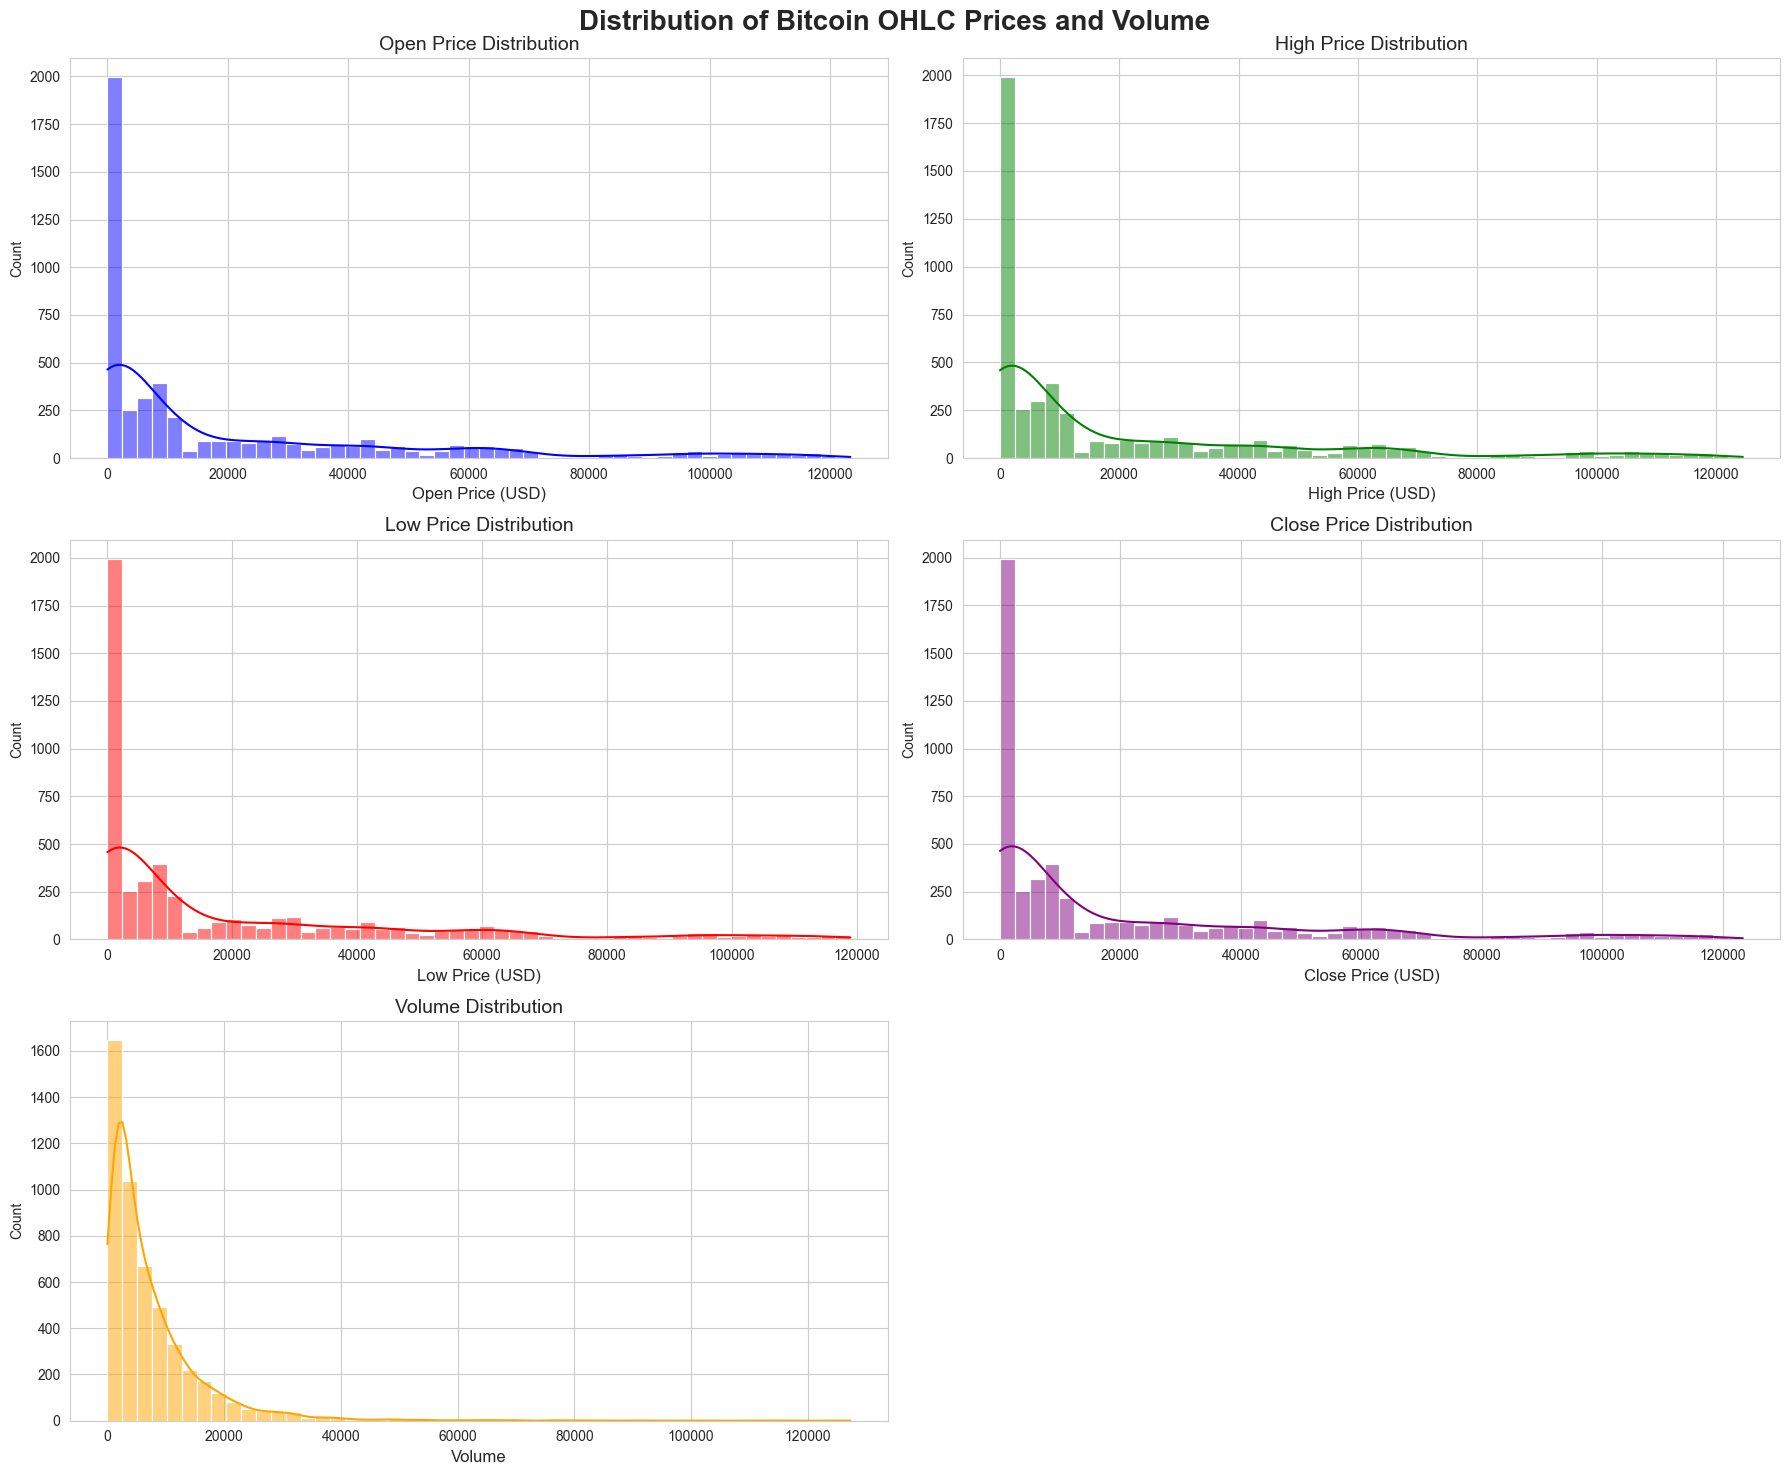

In [89]:
import matplotlib.pyplot as plt
import seaborn as sb

# 3x2 grid
fig, axes = plt.subplots(3, 2, figsize=(18, 15))
fig.suptitle('Distribution of Bitcoin OHLC Prices and Volume', fontsize=20, fontweight='bold')

# Open Price (Row 0, Col 0)
sb.histplot(data=data_from_start, x='Open', kde=True, bins=50, color='blue', ax=axes[0, 0])
axes[0, 0].set_title('Open Price Distribution', fontsize=14)
axes[0, 0].set_xlabel('Open Price (USD)', fontsize=12)

# High Price (Row 0, Col 1)
sb.histplot(data=data_from_start, x='High', kde=True, bins=50, color='green', ax=axes[0, 1])
axes[0, 1].set_title('High Price Distribution', fontsize=14)
axes[0, 1].set_xlabel('High Price (USD)', fontsize=12)

# Low Price (Row 1, Col 0)
sb.histplot(data=data_from_start, x='Low', kde=True, bins=50, color='red', ax=axes[1, 0])
axes[1, 0].set_title('Low Price Distribution', fontsize=14)
axes[1, 0].set_xlabel('Low Price (USD)', fontsize=12)

# Close Price (Row 1, Col 1)
sb.histplot(data=data_from_start, x='Close', kde=True, bins=50, color='purple', ax=axes[1, 1])
axes[1, 1].set_title('Close Price Distribution', fontsize=14)
axes[1, 1].set_xlabel('Close Price (USD)', fontsize=12)

# Volume (Row 2, Col 0)
sb.histplot(data=data_from_start, x='Volume', kde=True, bins=50, color='orange', ax=axes[2, 0])
axes[2, 0].set_title('Volume Distribution', fontsize=14)
axes[2, 0].set_xlabel('Volume', fontsize=12)
fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()

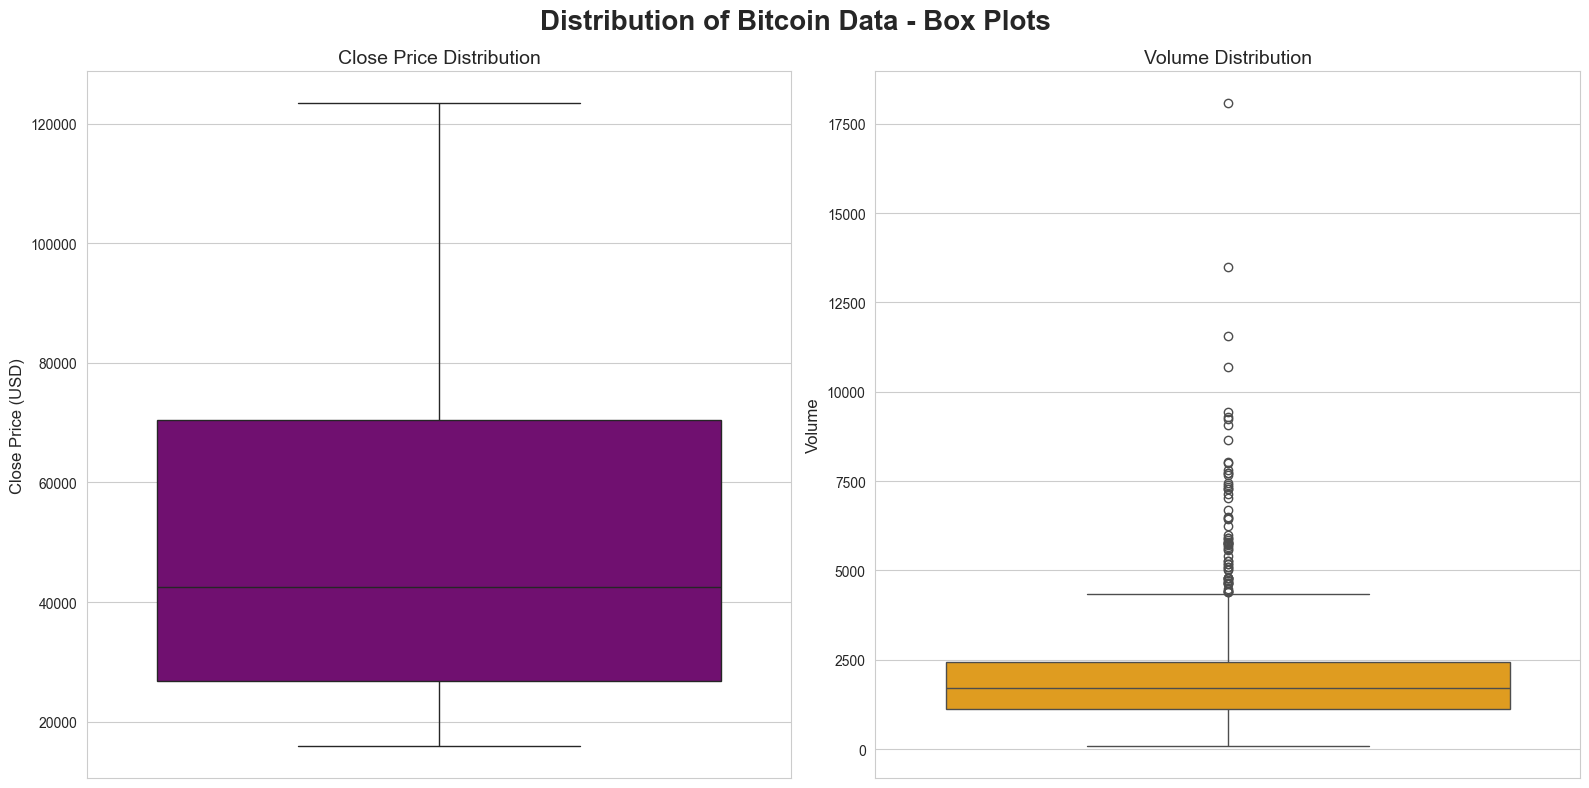

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle('Distribution of Bitcoin Data - Box Plots', fontsize=20, fontweight='bold')

# Close price 
sb.boxplot(data=data_daily, y='Close', color='purple', ax=axes[0])
axes[0].set_title('Close Price Distribution', fontsize=14)
axes[0].set_ylabel('Close Price (USD)', fontsize=12)

# Volume 
sb.boxplot(data=data_daily, y='Volume', color='orange', ax=axes[1])
axes[1].set_title('Volume Distribution', fontsize=14)
axes[1].set_ylabel('Volume', fontsize=12)

plt.tight_layout()
plt.show()

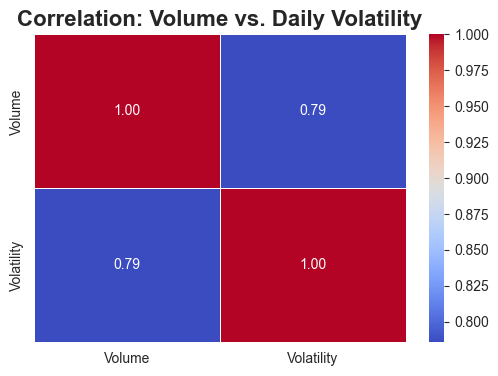

In [67]:

# Create a new column for daily volatility
# This formula measures the daily price range as a percentage of the opening price
data_daily['Volatility'] = (data_daily['High'] - data_daily['Low']) / data_daily['Open']

# Select the 'Volume' and our new 'Volatility' column
volume_volatility_data = data_daily[['Volume', 'Volatility']]

# Calculate the correlation matrix
correlation_matrix = volume_volatility_data.corr()

# Create a figure for the plot
plt.figure(figsize=(6, 4))
plt.title('Correlation: Volume vs. Daily Volatility', fontsize=16, fontweight='bold')

# Generate the heatmap
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Display the plot
plt.show()

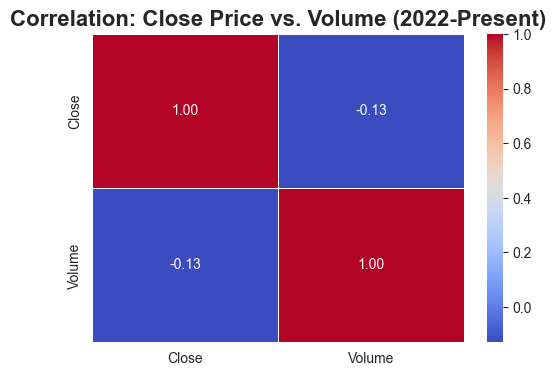

In [66]:
# Select the 'Close' and 'Volume' columns from the recent data
close_volume_recent = data_daily[['Close', 'Volume']]

# Calculate the correlation matrix
correlation_matrix_recent = close_volume_recent.corr()

# Create a figure for the plot
plt.figure(figsize=(6, 4))
plt.title('Correlation: Close Price vs. Volume (2022-Present)', fontsize=16, fontweight='bold')

# Generate the heatmap
sb.heatmap(correlation_matrix_recent, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Display the plot
plt.show()

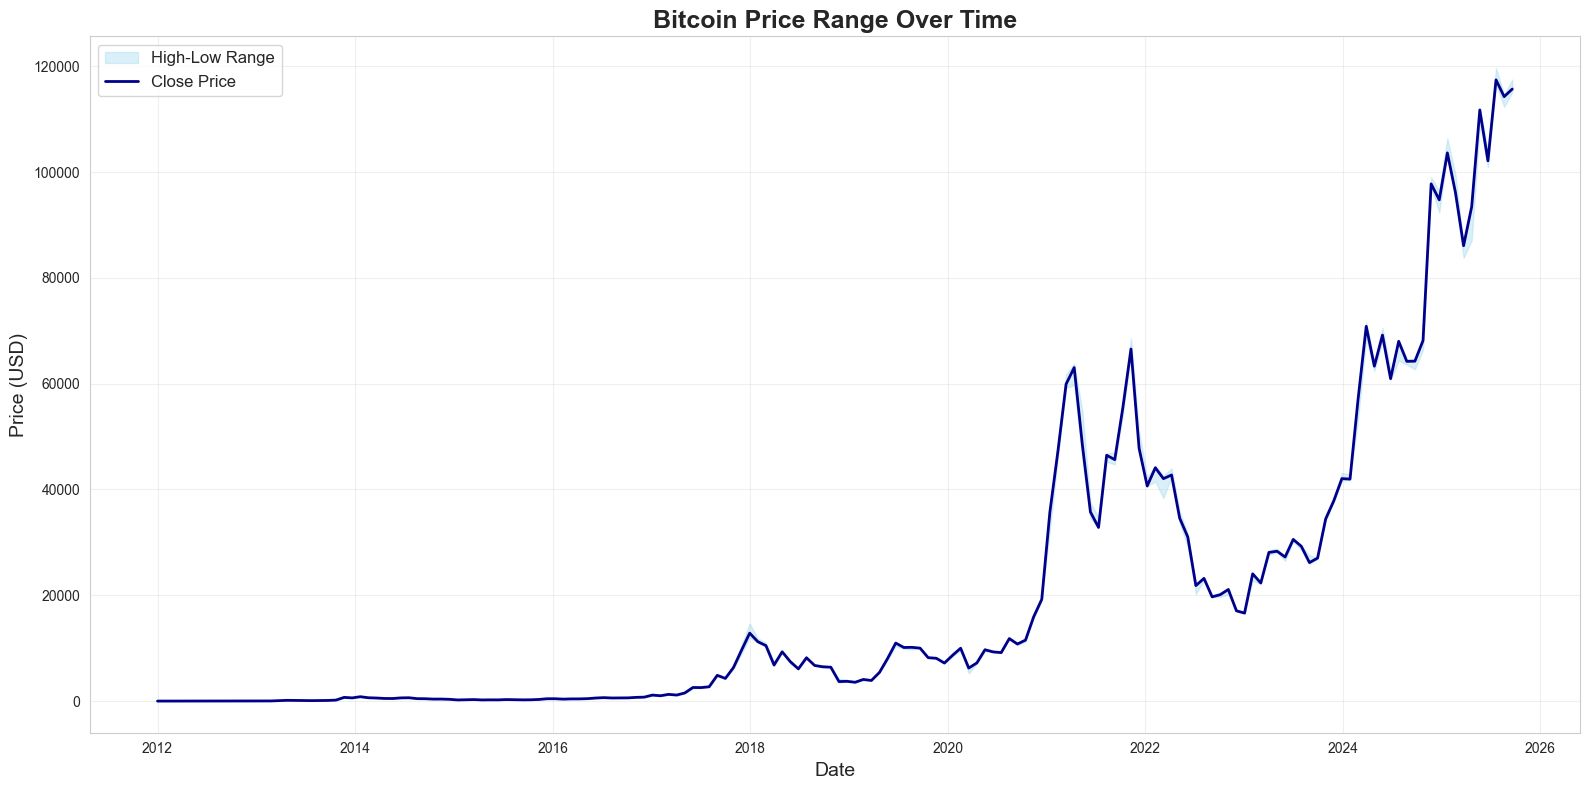

In [11]:
data_monthly = data_daily.iloc[::30]

plt.figure(figsize=(16, 8))
plt.fill_between(data_monthly.index, data_monthly['Low'], data_monthly['High'], 
                 alpha=0.3, label='High-Low Range', color='skyblue')
plt.plot(data_monthly.index, data_monthly['Close'], 
         linewidth=2, label='Close Price', color='darkblue')
plt.title('Bitcoin Price Range Over Time', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price (USD)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()